#**Marketing Analytics**

#Market Segmentation & Conjoint Analysis

*PRABU JEYABALAN*

*DATE: 10/06/2024*

#Part I: Segmentation

**A. Drop the guestID variable.**

  **a. Why will guestID not be relevant in a clustering model? In your answer
do not just write it will confuse the model.Instead take the time to
explain this with a sentence or two using a bit of math and your
understanding of Euclidean distance.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

In [ ]:
passholders = pd.read_csv('/content/passholders24.csv')

In [ ]:
# Drop the passholderID column
passholders = passholders.drop(columns=['passholderID'])

# Display the cleaned data
passholders.head()

,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
0,7,1,88.03,18,13,26,7,7.13,1.70,112.890,9,1,616.21
1,20,2,46.72,80,19,16,12,2.72,0.76,135.980,3,2,934.40
2,29,1,59.66,21,49,11,5,10.18,0.59,111.645,9,2,1730.14
3,15,2,32.85,43,6,6,17,4.94,1.25,80.160,8,2,492.75
4,11,6,27.65,13,48,26,1,11.04,0.52,129.170,8,0,304.15


*The passholderID is just a unique identifier for each visitor, like a name tag. It doesn’t have any information about the visitor's behavior, such as how many times they visited or how much they spent. Since clustering groups visitors based on similarities in their behavior, including passholderID would confuse the model because it would treat each visitor as different just based on this ID, rather than their actual behaviors. This would mess up the results because the ID doesn't help us understand how similar or different the visitors are. That's why we drop it before clustering.*

**B.Call the describe function on your dataset.**

 a. **How does this function help you to gain an overall sense of the columnsand values in this or any other dataset? Why is this valuable for any analyst who will use a dataset to build a model?**

In [ ]:
# Call describe() on passholders
summary_stats = passholders.describe()

# Display the summary statistics
print("Summary statistics for passholders:")
summary_stats

Summary statistics for passholders:


,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,648.000000
mean,15.185015,4.435780,56.177783,51.383792,25.119266,15.045872,12.821101,6.311147,0.981774,73.531560,4.530581,9.553517,844.512191
std,8.839787,2.908719,25.890004,26.237713,14.099118,8.807680,7.079084,3.198213,0.451993,43.834137,2.899250,86.925411,669.883194
min,1.000000,0.000000,10.020000,5.000000,1.000000,0.000000,0.000000,1.000000,0.200000,0.810000,0.000000,0.000000,13.310000
25%,7.000000,2.000000,33.792500,29.000000,13.000000,8.000000,7.000000,3.552500,0.590000,35.807500,2.000000,1.000000,290.167500
50%,16.000000,4.000000,57.695000,51.000000,25.000000,15.000000,13.000000,6.200000,0.975000,72.250000,5.000000,2.000000,673.525000
75%,23.000000,7.000000,78.032500,72.750000,37.000000,23.000000,19.000000,9.057500,1.380000,112.100000,7.000000,3.000000,1252.975000
max,29.000000,9.000000,99.940000,99.000000,49.000000,29.000000,24.000000,11.970000,1.790000,149.860000,9.000000,999.000000,2801.110000


*The describe function provides a quick statistical summary of the numerical columns in the dataset. It calculates metrics such as the count, mean, standard deviation, minimum, 25th percentile, median 50th percentile, 75th percentile, and maximum values for each numerical column.*
*It is valuable in the following way:*

*Understanding the Data Distribution: It gives a snapshot of the range and central tendency of the data. For example, the mean and median help you understand the average behavior, while the minimum and maximum show the data’s spread.*

*Identifying Outliers: By looking at the minimum, maximum, and standard deviation, you can spot unusual values or outliers that may affect the model’s performance or indicate data quality issues.*

*Detecting Missing Values: The count column shows how many entries each variable has. If the count is lower than expected, it could indicate missing values.*

*Informing Model Choices: This summary provides insights into how different variables behave, helping you choose the right modeling techniques or preprocessing steps like normalization or transformation before building the model.*

**C. Missing values/impossible values**

**a. Does this dataset contain any missing values? If so, how many? Which
column(s) have missing values? For the NaN values in this dataset, take a
look at the dataset description and determine the most suitable course of
action for handling these. Perform that course of action using Python
code. Why did you approach the NaN values in this way?**

In [ ]:
# Checking for missing values in each column
missing_values = passholders.isnull().sum()

# Displaying the columns with missing values
print("Columns with missing values and the number of missing values in each:")
print(missing_values[missing_values > 0])

Columns with missing values and the number of missing values in each:
total_spend    6
dtype: int64


In [ ]:
print("Passholders total spend mean:", passholders['total_spend'].mean())
print("Passholders total spend median:", passholders['total_spend'].median())
print("Passholders total spend standard deviation:", passholders['total_spend'].std())
print("Passholders total spend minimum:", passholders['total_spend'].min())
print("Passholders total spend maximum:", passholders['total_spend'].max())

Passholders total spend mean: 844.5121913580248
Passholders total spend median: 673.525
Passholders total spend standard deviation: 669.8831941593535
Passholders total spend minimum: 13.31
Passholders total spend maximum: 2801.11


In [ ]:
# Filling missing total_spend values with the median
passholders['total_spend'] = passholders['total_spend'].fillna(passholders['total_spend'].median())

 *Reson for choosing Median to replace six missing values:
Outliers: The presence of high outliers maximum at 2801.11 dollars will distort the mean, making it less representative of most passholders' spending behavior.
Skewness: The median is less affected by extreme values and outliers, providing a more robust measure of central tendency, especially when the data is skewed.
Better Representation: Since the median represents the middle of the distribution, it is a more accurate reflection of the typical passholder's total spend in this dataset.
Thus, filling the missing values with the median ensures that the imputed values are not overly influenced by outliers, leading to a more reliable data.*

  b. **What about impossible values? Do you see any impossible values here?
If so, handle them in any way that you see fit. Why did you take this
approach?**

In [ ]:
passholders.describe()

,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,15.185015,4.435780,56.177783,51.383792,25.119266,15.045872,12.821101,6.311147,0.981774,73.531560,4.530581,9.553517,842.943502
std,8.839787,2.908719,25.890004,26.237713,14.099118,8.807680,7.079084,3.198213,0.451993,43.834137,2.899250,86.925411,666.998087
min,1.000000,0.000000,10.020000,5.000000,1.000000,0.000000,0.000000,1.000000,0.200000,0.810000,0.000000,0.000000,13.310000
25%,7.000000,2.000000,33.792500,29.000000,13.000000,8.000000,7.000000,3.552500,0.590000,35.807500,2.000000,1.000000,290.452500
50%,16.000000,4.000000,57.695000,51.000000,25.000000,15.000000,13.000000,6.200000,0.975000,72.250000,5.000000,2.000000,673.525000
75%,23.000000,7.000000,78.032500,72.750000,37.000000,23.000000,19.000000,9.057500,1.380000,112.100000,7.000000,3.000000,1246.630000
max,29.000000,9.000000,99.940000,99.000000,49.000000,29.000000,24.000000,11.970000,1.790000,149.860000,9.000000,999.000000,2801.110000


*Getting a attendance 999 is impossibe in Special Event Attendance.*

In [ ]:
# filtering values greater than 200 in Special Event Attendance
# DataFrame to include only rows where 'Special Event Attendance' is greater than 10

passholders[passholders['Special Event Attendance'] > 10]

,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
79,17,1,79.38,16,36,16,13,6.51,1.62,81.615,8,999,673.525
121,15,2,81.10,55,25,10,14,9.85,0.21,103.525,6,999,1216.500
271,21,4,32.08,16,48,24,12,2.39,0.33,82.780,3,999,673.525
498,15,3,18.77,70,48,26,7,1.12,1.27,102.725,0,999,673.525
552,26,9,97.58,70,14,9,1,10.72,1.47,2.690,7,999,673.525


In [ ]:
# prompt: replace 999 in place with with 2.0

passholders['Special Event Attendance'] = passholders['Special Event Attendance'].replace(999, 2.0)
passholders.describe()

,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,15.185015,4.435780,56.177783,51.383792,25.119266,15.045872,12.821101,6.311147,0.981774,73.531560,4.530581,1.931193,842.943502
std,8.839787,2.908719,25.890004,26.237713,14.099118,8.807680,7.079084,3.198213,0.451993,43.834137,2.899250,1.438853,666.998087
min,1.000000,0.000000,10.020000,5.000000,1.000000,0.000000,0.000000,1.000000,0.200000,0.810000,0.000000,0.000000,13.310000
25%,7.000000,2.000000,33.792500,29.000000,13.000000,8.000000,7.000000,3.552500,0.590000,35.807500,2.000000,1.000000,290.452500
50%,16.000000,4.000000,57.695000,51.000000,25.000000,15.000000,13.000000,6.200000,0.975000,72.250000,5.000000,2.000000,673.525000
75%,23.000000,7.000000,78.032500,72.750000,37.000000,23.000000,19.000000,9.057500,1.380000,112.100000,7.000000,3.000000,1246.630000
max,29.000000,9.000000,99.940000,99.000000,49.000000,29.000000,24.000000,11.970000,1.790000,149.860000,9.000000,4.000000,2801.110000


*Since the mean is affected by the outlier, In-place of 999. I substuited with median value for Special Event Attendance as 2.0.
Which eventually brought the mean value from 9.5 to 1.93.*

**D. Data scaling**

**a. Do your variables need to be standardized? Why or why not?**

*Yes, standardizing the variables in this dataset is necessary for effective clustering.*
*Clustering algorithms such as K-Means are sensitive to the scale of the features.*
*If features have different scales some features are in the thousands while others are between 0 and 1,*
*features with larger values might dominate the distance calculations and unfairly influence the clustering process.*

 b.**If your data requires standardization, use Python to convert your values**
**into z scores and store the normalized data in a new dataframe. If not
proceed to the next step without changing the variables.**

In [ ]:
# Creating a scaler object
scaler = StandardScaler()

# Fit and data transform
scaled_passholders = pd.DataFrame(scaler.fit_transform(passholders), columns=passholders.columns)

# Displaying the scaled data
scaled_passholders.head()

,Number of Visits,Twilight Visits,Average Spend per Visit,Number of Rides Taken,Number of Food Purchases,Number of Arcade Plays,Parking Frequency,Time Spent in Park (hours),Weekday vs. Weekend Ratio,Distance Traveled (miles),Number of Guests Brought,Special Event Attendance,total_spend
0,-0.926638,-1.182104,1.231232,-1.273333,-0.860234,1.244654,-0.822925,0.256231,1.590236,0.898582,1.542758,-0.647673,-0.340191
1,0.545112,-0.838047,-0.365586,1.091487,-0.434350,0.108412,-0.116078,-1.123720,-0.491033,1.425744,-0.528327,0.047858,0.137222
2,1.564015,-1.182104,0.134603,-1.158906,1.695071,-0.459709,-1.105664,1.210618,-0.867432,0.870158,1.542758,0.047858,1.331152
3,-0.020946,-0.838047,-0.901724,-0.319777,-1.357099,-1.027830,0.590768,-0.429051,0.593884,0.151332,1.197577,0.047858,-0.525431
4,-0.473792,0.538181,-1.102727,-1.464044,1.624091,1.244654,-1.671141,1.479724,-1.022420,1.270266,1.197577,-1.343203,-0.808407


**E. Variable selection. Select any 5 variables from the potential set of inputs in order to build**
**your k-means clustering model.**


 a.  **Why did you choose this set of 5 variables? Note this can be
subjective. You dont need to do any rigorous data analysis here. One
sentence per variable or a single paragraph that explains how they
connect as a theme will be fine here.**


In [ ]:
# Variable selection
selected_variables = ['Number of Visits', 'Average Spend per Visit', 'Number of Rides Taken', 'Time Spent in Park (hours)', 'total_spend']
passholders_selected = scaled_passholders[selected_variables]

 *Reason for choosing these 5 variables*

*1. Number of Visits reflects the frequency of visits to the theme park, which gives insight into customer engagement.*

*2. Average Spend per Visit gives an idea of how much money customers are willing to spend during their visits.*

*3. Number of Rides Taken is a clear indicator of how much a customer is enjoying the thrill rides and attractions available.*

*4. Time Spent in Park hours demonstrates the duration of engagement with the theme park.*

*5. total spend represents the overall spending by the passholder, which is a key indicator of their willingness to spend.*

*I choosed these variables as they cover a variety of aspects of customer behavior and engagement and allow for a relatively holistic view of how they interact with the Lobster Land.*

**F. Elbow chart.**


**a. Build an elbow chart to help give you a sense of how you might build
your model.**

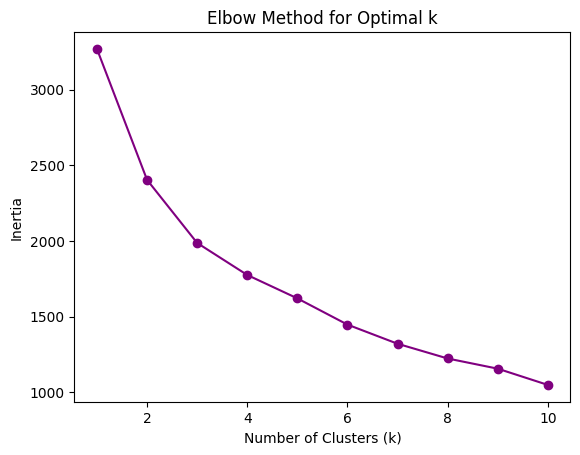

In [ ]:
# elbow chart
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(passholders_selected)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o',color='purple')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

*Based on the elbow chart, we can choose the number of clusters where the inertia starts to level off.
In this case, it appears to be around 3 and 5. so I choosed it as 4*

**H. Build a k-means model with your desired number of clusters.**

In [ ]:
# K-Means model with 5 clusters
warnings.simplefilter(action='ignore', category=FutureWarning)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(passholders_selected)

# cluster labels for each data point
cluster_labels = kmeans.labels_

# Adding cluster labels to the DataFrame
passholders_selected.loc[:, 'cluster'] = cluster_labels

# DataFrame with cluster labels
passholders_selected.head()

,Number of Visits,Average Spend per Visit,Number of Rides Taken,Time Spent in Park (hours),total_spend,cluster
0,-0.926638,1.231232,-1.273333,0.256231,-0.340191,2
1,0.545112,-0.365586,1.091487,-1.123720,0.137222,3
2,1.564015,0.134603,-1.158906,1.210618,1.331152,0
3,-0.020946,-0.901724,-0.319777,-0.429051,-0.525431,1
4,-0.473792,-1.102727,-1.464044,1.479724,-0.808407,2


**I. Generate and show mean values for each of your clusters.**

In [ ]:
# Grouping by cluster and calculating the mean values for each cluster
cluster_means = passholders_selected.groupby('cluster').mean()

# mean values for each cluster
print("Mean values for each cluster:")
cluster_means

Mean values for each cluster:


,Number of Visits,Average Spend per Visit,Number of Rides Taken,Time Spent in Park (hours),total_spend
cluster,,,,,
0,-0.966858,0.147535,-0.421406,0.650337,-0.668146
1,-0.699545,-0.148359,0.354822,-0.973725,-0.580171
2,0.821981,0.805538,0.075282,0.047097,1.287883
3,0.761022,-1.091581,-0.074577,0.404418,-0.349673


**J. Build any four simple visualizations to help management better understand your clusters (a
simple visualization could be a histogram, a barplot, a scatterplot, etc. – it should show original
variables from the dataset) You may wish to facet your visualizations by cluster.
For each one of your visualizations, include 2-3 sentences of description/
explanation. What does it show about your model?**

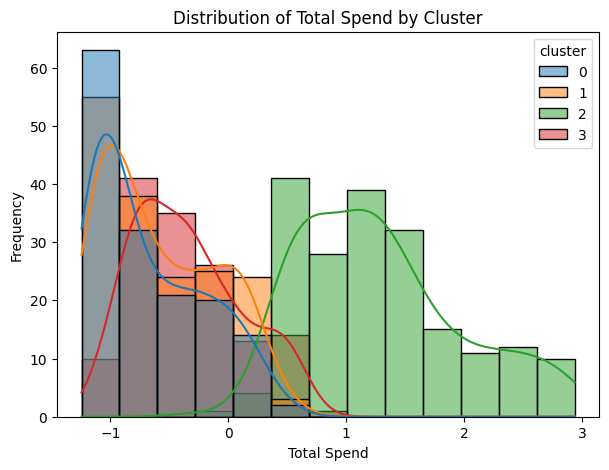

In [ ]:
# Visualization 1: Histogram of Total Spend by Cluster

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating the histogram of Total Spend by Cluster
plt.figure(figsize=(7, 5))
sns.histplot(data=passholders_selected, x='total_spend', hue='cluster',
             kde=True, palette='tab10')
plt.title('Distribution of Total Spend by Cluster')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()


*The colors represent four different clusters 0, 1, 2, and 3.*

*Distribution of Spending*

*Cluster 0 Blue appears to have lower total spending, concentrated mostly in the negative and slightly positive ranges. The frequency is highest for this segment in the negative range, which suggests that individuals in this cluster might be spending less or have fewer transactions.*

*Cluster 1 Orange also displays some negative spending values, but it is more evenly distributed in the negative to zero ranges. The frequency is lower compared to Cluster 0.*

*Cluster 2 Green stands out with high total spending. The majority of individuals in this cluster have positive total spending values, ranging from 1 to 3. The KDE line shows a peak indicating a concentration of members spending more.*

*Cluster 3 Red Similar to Cluster 1, Cluster 3 has a more evenly distributed spending range that falls into both positive and negative values. However, the frequency for this cluster is lower, and the KDE line shows a consistent but moderate trend throughout the range.*

*Frequency of Spending*

*High Frequency in Negative Spending - The frequency of spending is highest for clusters in the negative values. This may indicate that there are more customers with relatively low or negative spending.*

*Distinct Clusters with High Spending Cluster 2 - The green Cluster 2 displays higher spending, suggesting that this cluster represents high-value customers. This segment has the most pronounced positive spending pattern.*

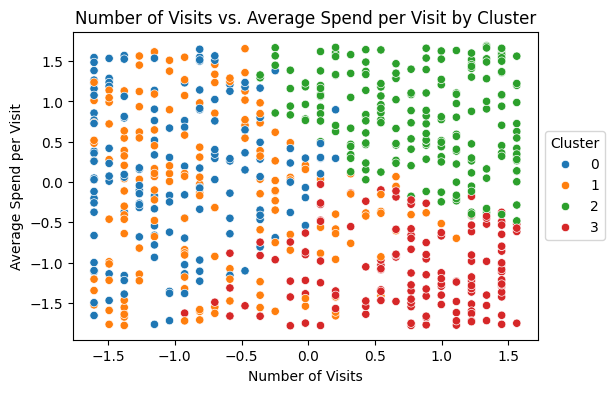

In [ ]:
# Visualization 2: Scatterplot of Number of Visits vs. Average Spend per Visit by Cluster
plt.figure(figsize=(6, 4))
sns.scatterplot(data=passholders_selected, x='Number of Visits',
               y='Average Spend per Visit', hue='cluster',palette='tab10')
plt.title('Number of Visits vs. Average Spend per Visit by Cluster')
plt.xlabel('Number of Visits')
plt.ylabel('Average Spend per Visit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')
plt.show()

*The scatter plot shows four distinct clusters, represented by different colors blue, orange, green, and red. These clusters provide insights into different customer segments based on their number of visits and average spend per visit.*

*Cluster 0 Blue Customers in this cluster tend to have varying numbers of visits, both positive and negative values, and have a wide range of average spend per visit. This cluster appears to be a mix of different customer behaviors, possibly indicating a general group with no particularly extreme visiting or spending patterns.*

*Cluster 1 Orange Cluster 1 represents customers with a moderate number of visits and average spending per visit. The orange dots show that these customers are spread relatively evenly across the visit and spend axes, indicating that they do not belong to any of the extremes. This group could represent more regular customers who visit with consistent patterns.*

*Cluster 2 Green The customers in this cluster tend to have higher numbers of visits and higher average spending per visit. The green dots are mostly located in the upper right corner of the scatter plot, indicating high engagement and spending. This cluster likely represents the most valuable customers to the business those who visit frequently and spend a lot.*

*Cluster 3 Red represents customers who tend to have fewer visits and lower average spending per visit. The red dots are mostly in the lower right corner of the scatter plot, showing that these customers are relatively less engaged. They are likely infrequent visitors and spend less per visit, making them the least profitable segment.*

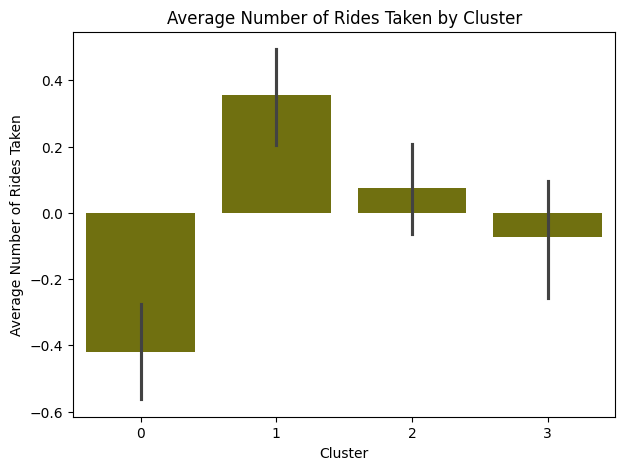

In [ ]:
# Visualization 3: Barplot of Number of Rides Taken by Cluster
plt.figure(figsize=(7, 5))
sns.barplot(data=passholders_selected, x='cluster', y='Number of Rides Taken',color= 'olive')
plt.title('Average Number of Rides Taken by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Rides Taken')
plt.show()

*This barplot compares the average number of rides taken by each cluster.*

*It helps to identify which clusters are more likely to engage with the rides and attractions.*

*It shows the average number of rides taken by each cluster of customers. Cluster 1 shows the highest average number of rides taken, indicating more frequent ridership compared to other clusters. Cluster 0 shows a negative average value, possibly suggesting less frequent ridership or fewer overall transactions in comparison. Clusters 2 and 3 have relatively lower averages and appear quite similar, indicating consistent but moderate ride usage. The error bars reflect the variability in the data, with Cluster 1 displaying the most significant variation. Overall, Cluster 1 is the most active, while Clusters 0, 2, and 3 have lower averages.*

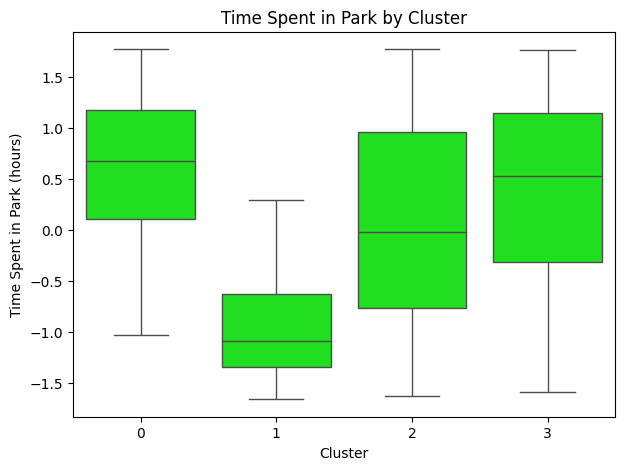

In [ ]:
# Visualization 4: Boxplot of Time Spent in Park by Cluster
plt.figure(figsize=(7, 5))
sns.boxplot(data=passholders_selected, x='cluster', y='Time Spent in Park (hours)',color="#00FF00")
plt.title('Time Spent in Park by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Time Spent in Park (hours)')
plt.show()

*This box plot illustrates the distribution of time spent in the park by different clusters of customers. Each box represents the interquartile range IQR, showing where the central 50% of data points lie, while the whiskers indicate the spread of data from the minimum to the maximum values.*

*Cluster 0 shows a median around 0.5 hours, with a relatively wider range indicating variability in park visit durations.*

*Cluster 1 has a median below zero, with a smaller IQR and narrower spread, indicating a more consistent but shorter visit duration compared to other clusters.*

*Cluster 2 and Cluster 3 both have high medians, suggesting longer average times spent in the park, with Cluster 2 having a broader spread compared to Cluster 3.*

**K. Give a descriptive name to each one of your clusters, along with a few sentences of
explanation for the name that you chose. As you describe each segment, write a bit about the
types of visitors likely to belong to each group.**

*Cluster 0: "Bargain Buccaneers" Low total spend, moderate visits, moderate ride usage, high park time*

*Cluster 1: "Adrenaline Junkies" Moderate total spend, moderate visits, high ride usage, low park time*

*Cluster 2: "Splashing Cash Crew" High total spend, high visits, moderate ride usage, moderate park time*

*Cluster 3: "One-and-Done Drifters" Low total spend, low visits, low ride usage, high park time*

*These names reflect the key characteristics observed in each cluster*:

*Bargain Buccaneers are budget-conscious but still enjoy the park.They may be families looking for a more affordable experience or individuals who prioritize value for their money.*

*Adrenaline Junkies prioritize the rides and attractions, suggesting a preference for excitement and adventure. They might be younger individuals or those who seek out the adrenaline rush offered by the parks features.*

*Splashing Cash Crew are frequent and high-spending customers who are engaged with the park. They may be season pass holders or individuals who appreciate the amenities and overall experience the park offers.*

*One-and-Done Drifters use the park less frequently and have lower spending patterns. They could be first-time visitors or those who only attend special events or during specific periods of the year.*

**L. Finally, how can Lobster Land use this model to target the groups that you have identified
during the coming winter “off-season” period in its email campaign? Include at least a couple of
sentences for each group in your model. Also, in your answer, identify one group that you feel
is most worthy of outreach/engagement efforts, and say why. Also, identify one cluster that is
least worthy of outreach/engagement efforts, and say why. In your answer, be more creative
than just saying “send more discount coupons” to the groups.**


*L. Targeting Strategies for the Winter Off-Season

*Based on the identified clusters, Lobster Land can tailor the email campaigns to effectively engage each group during the winter off-season.*

*Cluster 0: "Bargain Buccaneers"*

*Offering promotions and discounts specifically for budget-conscious visitors, such as early bird deals, combo packages, and discounts for weekdays or specific periods. Highlighting the value proposition of visiting during the off-season with fewer crowds.*

*Cluster 1: "Adrenaline Junkies"*

*Can Promote upcoming special events like thrilling ride competitions or demonstrations. Offering exclusive access to new or popular rides and attractions during the off-season.*

*Cluster 2: "Splashing Cash Crew"*

*Lobster land can Provide exclusive access to VIP experiences, such as behind-the-scenes tours,special events, or early access to upcoming attractions. Offering luxury packages that include* accommodations, meals, and other perks.*

*Cluster 3: "One-and-Done Drifters"*

*Offer enticing promotions, such as flash sales or limited-time discounts,to encourage repeat visits or attract new visitors. Can Promote value-added offers like bundled tickets that include meals or merchandise.*

*Most Worthy of Outreach: "Splashing Cash Crew"*

*Reason: These are the highest spending and most engaged group of visitors. Their loyalty and spending patterns make them ideal targets for generating revenue and maintaining a customer base during the off-season. By targeting them with premium experiences and offers, Lobster Land can maximize revenue and build stronger relationships with their most valuable customers.*

*Least Worthy of Outreach: "One-and-Done Drifters"*

*Reason: These visitors typically have low spending and engagement with the park.Investing extensive outreach efforts on them may not yield significant returns.It may be more cost-effective to focus on converting them into more frequent visitors through targeted promotions and attractive deals, rather than a large-scale outreach effort.*


#**Part II: Conjoint Analysis with a Linear Model: (4 points)**

**A. Read the dataset digital_quest.csv into your local environment in Jupyter
Notebook or Colab.**

In [ ]:
quest = pd.read_csv('/content/digital_quest.csv')

In [ ]:
quest.head()

,bundleID,narrative,duration,prizes,collaboration,quest_progression,task_total,technology,avg_rating
0,1,Puzzle,30,Digital Badges,Solo,linear,5,app_only,3.078555
1,2,Puzzle,30,Digital Badges,Solo,linear,5,interactive_kiosks,3.287414
2,3,Puzzle,30,Digital Badges,Solo,linear,5,mixed,6.293475
3,4,Puzzle,30,Digital Badges,Solo,linear,10,app_only,4.361070
4,5,Puzzle,30,Digital Badges,Solo,linear,10,interactive_kiosks,4.316422


In [ ]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   narrative          6912 non-null   object 
 1   duration           6912 non-null   int64  
 2   prizes             6912 non-null   object 
 3   collaboration      6912 non-null   object 
 4   quest_progression  6912 non-null   object 
 5   task_total         6912 non-null   int64  
 6   technology         6912 non-null   object 
 7   avg_rating         6912 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 432.1+ KB


In [ ]:
for column in quest.columns:
  print(f"Column: {column}, Unique values: {quest[column].unique()}")

Column: narrative, Unique values: ['Puzzle' 'Physical Activity' 'Knowledge Quiz' 'Combination']
Column: duration, Unique values: [ 30  60  90 240]
Column: prizes, Unique values: ['Digital Badges' 'Physical Prizes' 'Discount Coupons'
 'Exclusive Experiences']
Column: collaboration, Unique values: ['Solo' 'Group' 'competing_teams']
Column: quest_progression, Unique values: ['linear' 'open_world' 'tiered']
Column: task_total, Unique values: [ 5 10 20 30]
Column: technology, Unique values: ['app_only' 'interactive_kiosks' 'mixed']
Column: avg_rating, Unique values: [3.07855534 3.2874137  6.29347532 ... 6.13766137 5.18257549 5.1468906 ]


**B. Based on the descriptions shown above, which of your variables are numeric,
and which are categorical? (The standard you should use when answering this is
that something that is both represented by a number, and for which that number
has valid mathematical meaning, is numeric).**


***Numeric Variables:***

*1.avg_rating*

***Categorical Variables:***

*1.bundleID*

*2.Task total*

*3.narrative*

*4.duration*

*5.prizes*

*6.collaboration*

*7.Quest progression*

*8.Technology*


**C. After first removing the bundleID variable, use the pandas get_dummies()
function in order to prepare the remaining variables for use in a linear model. Inside
this function, include this argument: drop_first = True. Doing this will save us from
the multicollinearity problem that would make our model unreliable. Be sure to
dummify ALL of your input variables, even the numeric ones.**

In [ ]:
# Removing bundleID variable
quest = quest.drop('bundleID', axis=1)

# Using get_dummies to create dummy variables for all columns
quest_dummy = pd.get_dummies(quest, drop_first=True)

# resulting dataframe with dummy variables
quest_dummy.head()

,duration,task_total,avg_rating,narrative_Knowledge Quiz,narrative_Physical Activity,narrative_Puzzle,prizes_Discount Coupons,prizes_Exclusive Experiences,prizes_Physical Prizes,collaboration_Solo,collaboration_competing_teams,quest_progression_open_world,quest_progression_tiered,technology_interactive_kiosks,technology_mixed
0,30,5,3.078555,False,False,True,False,False,False,True,False,False,False,False,False
1,30,5,3.287414,False,False,True,False,False,False,True,False,False,False,True,False
2,30,5,6.293475,False,False,True,False,False,False,True,False,False,False,False,True
3,30,10,4.361070,False,False,True,False,False,False,True,False,False,False,False,False
4,30,10,4.316422,False,False,True,False,False,False,True,False,False,False,True,False


**a. Why should the numeric input variables based on this survey data be
dummified?**

*Dummifying these variables converts them into binary variables that accurately reflect the underlying categorical nature of the data. This ensures that the model properly understands and interprets the variables, preventing inaccurate predictions resulting from treating categorical data as continuous.*

**D. Build a linear model with your data, using the average rating as the outcome
variable, and with all of your other variables as inputs.**

In [ ]:
X = quest_dummy.drop('avg_rating', axis=1)
y = quest_dummy['avg_rating']

# linear regression model
model = LinearRegression()

# Fitting the model to the data
model.fit(X, y)

# coefficients of the model
print("Coefficients:", model.coef_)

# intercept of the model
print("Intercept:", model.intercept_)

Coefficients: [-2.05349154e-04  2.71411095e-02 -4.58967882e-01  6.91220625e-01
 -6.41295641e-02 -8.88863410e-03  5.29394161e-01 -1.05372929e+00
 -7.20606521e-01  1.53643832e-02  4.43825269e-01  4.14283244e-01
 -2.88512449e-01 -2.21220586e-01]
Intercept: 5.183288008253717


**E. Display the coefficient values of your model inputs.**

In [ ]:
# Coefficients of the model
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient',ascending = False))

                         Variable  Coefficient
3     narrative_Physical Activity     0.691221
6    prizes_Exclusive Experiences     0.529394
10   quest_progression_open_world     0.443825
11       quest_progression_tiered     0.414283
1                      task_total     0.027141
9   collaboration_competing_teams     0.015364
0                        duration    -0.000205
5         prizes_Discount Coupons    -0.008889
4                narrative_Puzzle    -0.064130
13               technology_mixed    -0.221221
12  technology_interactive_kiosks    -0.288512
2        narrative_Knowledge Quiz    -0.458968
8              collaboration_Solo    -0.720607
7          prizes_Physical Prizes    -1.053729


**F. Write a few paragraphs for Lobster Land management about what your model is
showing you.**

**It would be good here to include some detail about which features seemed to be
most popular, or least popular, among respondents. However, a truly thoughtful
answer to this question will go beyond simply listing the coefficients in order of
popularity. What OTHER insights can you draw from this? Is there anything else
that you think Lobster Land should consider before simply implementing the ‘most
popular’ options? Remember, Lobster Land hired you as a consultant -- don’t be
afraid to show some creativity here.**

***Based on the linear model results, we can observe several interesting insights regarding respondents' preferences for the digital quest at Lobster Land.***

***Key Insights:***

***Most Popular Features:***

*Physical Activity Narratives: The narrative option of "Physical Activity" shows a strong positive coefficient of 0.691, suggesting that respondents preferred physically engaging activities as part of their quest experience. Lobster Land may want to explore this option further as it aligns well with the active nature of visitors.*

*Exclusive Experiences as Prizes: The option of offering Exclusive Experiences as prizes has a positive coefficient of 0.529, indicating that respondents valued unique and exclusive rewards. This could be a major draw for visitors, especially those seeking more memorable or one-of-a-kind experiences.*

*Open-world Progression: The quest progression style of open-world, which allows users to complete tasks in any order, is positively rated with a coefficient of 0.443. Visitors seem to appreciate flexibility and autonomy, which could enhance engagement.*

*Tiered Progression: Similarly, tiered progression tasks that unlock progressively is also rated positively 0.414, suggesting that some level of structure, but with an element of discovery or achievement, resonates with users.*

***Least Popular Features:***

*Physical Prizes: Surprisingly, offering Physical Prizes was viewed negatively by respondents, with the most negative coefficient -1.053. This suggests that visitors may find digital or exclusive prizes more appealing in the context of a digital quest, possibly due to convenience or the added value of unique experiences.*

*Solo Collaboration: The option for solo participation, where respondents would perform tasks individually, also has a strongly negative coefficient -0.720. This suggests that visitors may prefer more interactive or social experiences, whether through competing teams or group activities.*

*Knowledge Quiz Narratives: The narrative focused on Knowledge Quizzes is also less popular, with a negative coefficient -0.459, indicating that respondents prefer more dynamic or active types of quests rather than those focused purely on intellectual engagement.*

***While the model provides valuable insights into preferences, it is essential for Lobster Land to consider several factors beyond simply implementing the most popular options:***

*Balance Between Flexibility and Structure: Both open-world and tiered progression styles were rated highly. This suggests that visitors enjoy flexibility, but some may also appreciate a sense of progression and achievement. Lobster Land could consider offering different quest styles to cater to both groups, or combining these approaches, allowing flexibility within a broader tiered structure.*

*Social Engagement and Group Dynamics: The negative perception of solo collaboration highlights the importance of social interaction in the park experience. Lobster Land should consider designing quests that encourage group participation and social bonding. This could also foster a more competitive, fun atmosphere, which aligns with the park's overall entertainment objectives.*

*Physical Prizes and Logistics: The negative response to physical prizes might stem from logistical challenges or inconvenience associated with redeeming them. Digital or exclusive experiences are not only perceived as more valuable, but they also likely involve fewer logistical hurdles. Lobster Land may consider enhancing the convenience and appeal of prize redemption if physical prizes are to remain an option.*

*Duration of the Quests: Although the duration variable has a small negative coefficient -0.0002, it’s important for Lobster Land to find the right balance in quest duration. Extremely long quests might not be ideal, and the park should consider providing options that can be completed within a reasonable time frame to maintain visitor engagement.*



***Creative Recommendations:***

*1.Augmented Reality (AR) Challenges  Digital Meets Physical*

*Lobster land can use augmented reality (AR) technology to blend the digital quest with physical park locations. For example, visitors could use their phones to unlock hidden AR objects around the park or participate in virtual scavenger hunts that overlay digital puzzles or characters onto real-world attractions.*

*2.Surprise Flash Quests Spontaneous, Timed Challenges*

*Can introduce surprise flash quests that suddenly pop up on visitors devices at random times during the day. These flash quests could offer high-value rewards like fast passes, exclusive park privileges, or digital badges for completing a short, fun task in a limited time.The element of surprise combined with a ticking clock creates a sense of urgency and excitement. Plus, the rewards give visitors a quick hit of instant gratification that makes the experience memorable.*

*3.Collaborative Quests with Social Media Integration*

*Can create quests that require teamwork not just with visitors in the park but also with friends outside the park through social media. For example, visitors could send real-time challenges to friends who aren't at the park, earning points together as a team.This taps into the social engagement aspect, making the digital quest a shared experience even with people who arent physically at the park. This strategy also creates buzz and free marketing for Lobster Land as players post about their quests on social media.*